In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import *

In [2]:
phenos = pd.read_table("/oak/stanford/groups/mrivas/projects/biomarkers/cnv/HNF1B_wb_phewas_p001.tsv", 
                       usecols=[0,8,9,10,11,12],
                       names=["PHENO","N","BETA","SE","TSTAT","P"])

phenos = phenos[phenos['PHENO'].apply(lambda s: s[-5:-3]!='30')]

#with open("/oak/stanford/groups/mrivas/projects/biomarkers/cnv/pheno_index_v2.20190513.txt", "r") as i:
with open('/oak/stanford/groups/mrivas/users/ytanigaw/repos/rivas-lab/biomarkers/common/phenotypes.txt', "r") as i:
    names = {line.split('\t')[0]:line.rstrip().split('\t')[2] for line in i}

phenos['BIN']  = phenos['PHENO'].apply(lambda x: 1 if 'QT' in x or 'INI' in x else 0)
phenos['NAME'] = phenos['PHENO'].apply(lambda x: names.get(x) if x in names 
                                                 else names.get(x.replace('QT_FC', 'INI')) if x.replace('QT_FC','INI') in names 
                                                 else names.get(x.replace('BIN_FC','HC')))
phenos['-log10P'] = phenos['P'].apply(lambda x:-np.log10(x))
phenos=phenos[['NAME','N','BETA','SE','P','BIN','-log10P']]

phenos.head(15)

,NAME,N,BETA,SE,P,BIN,-log10P
11,Renal/kidney failure,333522,1.724580,0.344136,5.405290e-07,0,6.267181
12,None,333522,3.174890,0.664599,1.777900e-06,0,5.750093
21,None,333522,4.092740,1.052200,1.003740e-04,0,3.998379
22,None,333522,2.009340,0.529046,1.458400e-04,0,3.836123
23,None,108631,2.381350,0.631711,1.634560e-04,0,3.786599
24,None,333522,3.937460,1.053790,1.866230e-04,0,3.729035
26,None,127667,-0.647641,0.178129,2.772280e-04,1,3.557163
28,None,300087,-0.331303,0.093859,4.159480e-04,1,3.380961
29,None,333522,2.041430,0.589499,5.341900e-04,0,3.272304
30,None,108899,2.573740,0.752649,6.271860e-04,0,3.202604


In [3]:
phenos[~phenos['NAME'].isnull() & ~phenos['N'].isnull()]

,NAME,N,BETA,SE,P,BIN,-log10P
11,Renal/kidney failure,333522,1.72458,0.344136,5.405290e-07,0,6.267181
47,Bilateral oophorectomy (both ovaries removed),176818,1.21458,0.403845,2.633740e-03,0,2.579427
54,Cerebral palsy,333522,1.71406,0.588887,3.606350e-03,0,2.442932
99,Dentures,332815,0.65640,0.252200,9.249490e-03,0,2.033882


In [4]:
bioms=pd.read_table("/oak/stanford/groups/mrivas/projects/biomarkers/cnv/meta_biomarker_result_HNF1B.tsv",
                    header=None, usecols=[0,2,3,4], names=['NAME','BETA','SE','P'])
bioms['NAME']=bioms['NAME'].apply(lambda s:s.replace('_1',''))
bioms['BIN']=0
bioms['-log10P']=bioms['P'].apply(lambda p:-np.log10(p))
bioms.head()

,NAME,BETA,SE,P,BIN,-log10P
0,Alanine_aminotransferase,0.2693,0.1073,0.012040,0,1.919374
1,Albumin,-0.1851,0.1098,0.091970,0,1.036354
2,Alkaline_phosphatase,0.3317,0.1073,0.001986,0,2.702021
3,Apolipoprotein_A,-0.1295,0.1105,0.241100,0,0.617803
4,Apolipoprotein_B,-0.3050,0.1073,0.004457,0,2.350957


In [5]:
phenos=pd.concat([bioms, phenos])
phenos.index=[i for i in range(len(phenos.index))]
phenos.head()

,NAME,BETA,SE,P,BIN,-log10P,N
0,Alanine_aminotransferase,0.2693,0.1073,0.012040,0,1.919374,NaN
1,Albumin,-0.1851,0.1098,0.091970,0,1.036354,NaN
2,Alkaline_phosphatase,0.3317,0.1073,0.001986,0,2.702021,NaN
3,Apolipoprotein_A,-0.1295,0.1105,0.241100,0,0.617803,NaN
4,Apolipoprotein_B,-0.3050,0.1073,0.004457,0,2.350957,NaN


In [6]:
phenos.tail()

,NAME,BETA,SE,P,BIN,-log10P,N
96,None,2.229670,0.845666,0.008374,0,2.077044,333522.0
97,None,1.626080,0.614040,0.008378,1,2.076859,459.0
98,None,1.881130,0.722541,0.009228,0,2.034896,333522.0
99,Dentures,0.656400,0.252200,0.009249,0,2.033882,332815.0
100,None,0.279587,0.108246,0.009799,1,2.008840,285890.0


In [7]:
phenos[(phenos['P'] < 0.01/25000)].sort_values('P')

,NAME,BETA,SE,P,BIN,-log10P,N
14,Cystatin_C,0.9663,0.1072,2.034000e-19,0,18.691649,NaN
16,eGFR,-0.9204,0.1070,7.824000e-18,0,17.106571,NaN
12,Creatinine,0.9212,0.1072,8.701000e-18,0,17.060431,NaN
39,Urea,0.7735,0.1073,5.523000e-13,0,12.257825,NaN


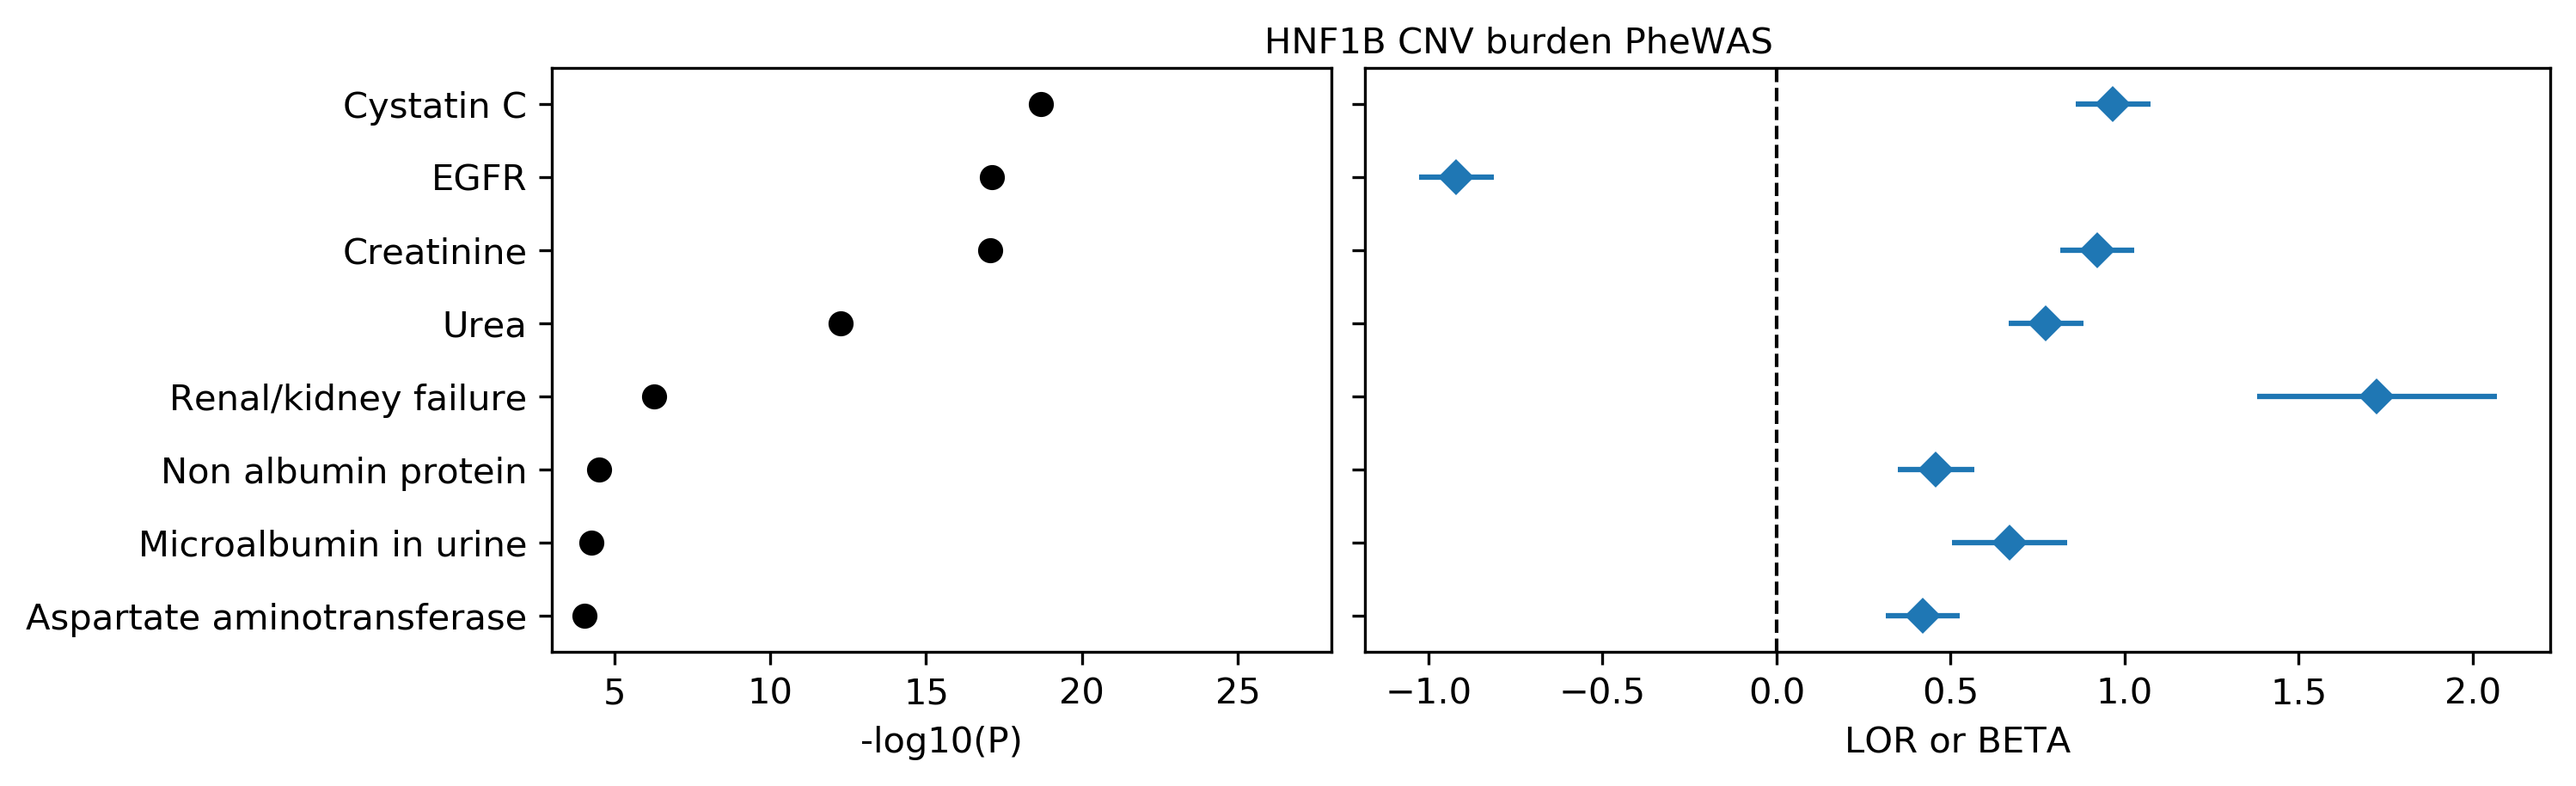

In [8]:
# do the plot
filter_kw = lambda s: True # all([i not in s for i in ['HDL']])

y_ht = 3
fig  = plt.figure(figsize=(10, y_ht), dpi=300)
grid = plt.GridSpec(y_ht, 10, hspace=0.3)


for cnv_ix, cnv in enumerate(["HNF1B"]):
    # select significant data, truncate visualization
    data = phenos.loc[(~phenos['NAME'].isnull()) & (phenos['NAME'].apply(filter_kw))].query('P < 1e-4').copy()
    
    data = data.query('SE < 1').sort_values('P').head(50).copy()
    # group by QT/BIN status, plus fat measurement for second CNV
    order = [irow[0] for irow in sorted([irow for irow in data.iterrows()], 
                                         key=lambda x: -x[1]['P'] + 100*x[1]['BIN'])] 

    # title
    fig.text(0.5, 0.9, 'HNF1B CNV burden PheWAS', horizontalalignment='center')
    
    # p-values
    ax = fig.add_subplot(grid[:,:4])
    ax.plot([data.loc[i,'-log10P'] for i in order], list(range(len(order))), 'ko')
    ax.set_ylim(-0.5,len(order)-0.5)
    ax.set_yticks(list(range(len(order)))) 
    ax.set_yticklabels(list(map(lambda s:s[0].upper() + s[1:].replace('_',' '), [data.loc[i,'NAME'] for i in order])))
    ax.set_xlabel('-log10(P)')
    ax.set_xlim(3,28)

    # betas
    ax = fig.add_subplot(grid[:,4:])
    ax.errorbar(x=[data.loc[i,'BETA'] for i in order], 
                y=list(range(len(order))),
                xerr=[data.loc[i,'SE'] for i in order],
                linestyle='', marker='D')
    ax.set_ylim(-0.5,len(order)-0.5)
    ax.set_yticks(list(range(len(order))))
    ax.set_yticklabels(['' for _ in order])
    ax.set_xlabel('LOR or BETA')
    # ax.set_xlim(-1.5,4.5)
    ax.yaxis.set_label_position("right")

    # dash line for betas
    plt.plot([0,0], ax.get_ylim(), 'k--', linewidth=1)

plt.show()